## Customer Churn Prediction Using Artificial Neural Network (ANN)
Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\HP\\Desktop\\Internship\\DeepLearningCodebasics\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3846,1767-TGTKO,Female,0,Yes,Yes,8,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.45,411.75,No
137,3774-VBNXY,Female,0,Yes,Yes,64,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.20,1277.75,No
821,5318-YKDPV,Male,0,Yes,Yes,43,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),79.15,3566.6,No
6303,6308-CQRBU,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.25,7707.7,No
6760,5295-PCJOO,Male,0,No,Yes,4,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,49.40,184.4,Yes


In [5]:
df.customerID.value_counts()

9348-ROUAI    1
8819-ZBYNA    1
3082-YVEKW    1
2307-FYNNL    1
2805-EDJPQ    1
             ..
0757-WCUUZ    1
4742-TXUEX    1
9840-EFJQB    1
3682-YEUWS    1
0362-ZBZWJ    1
Name: customerID, Length: 7043, dtype: int64


### First of all, drop customerID column as it is of no use

In [6]:
df.drop('customerID',axis=1,inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Quick glance at above makes us realize that TotalCharges should be float but it is an object. Let's check what's going on with this column

In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

### It's a string, lets convert it into float

In [10]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [11]:
#pd.to_numeric(df.TotalCharges)
#above line of code will create below error
#ValueError: Unable to parse string " " at position 488


### some values seems to be not numbers but blank string. Let's find out such rows

In [12]:

pd.to_numeric(df.TotalCharges,errors='coerce').isnull()#igonoring errors using coerce

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [13]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]#it will show only those rows which 
#has null as true in Total charges column

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

11 rows  are there which has null i.e. blank in Total Charges column

In [15]:
df.shape

(7043, 20)

So out of 7043 rows if we drop 11 rows then it's not a big deal

In [16]:
#iloc is integer location , this is like array indexing
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

We can see TotalCharges in blank for row number 488

In [17]:
df.iloc[488].TotalCharges

' '

In [18]:
df[df.TotalCharges!=' '].shape

(7032, 20)

### Remove rows with space in TotalCharges

In [19]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [20]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
df1.TotalCharges=df1.TotalCharges.astype(float)
#or we can use
#df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
df1.TotalCharges.dtypes

dtype('float64')

### We want to find out tenure of the customers which are not leaving

In [23]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [24]:
df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

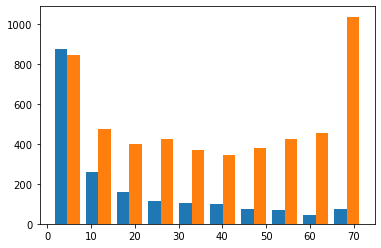

In [25]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no])

(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

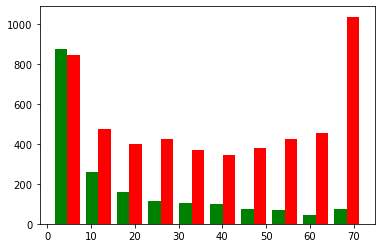

In [26]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'])

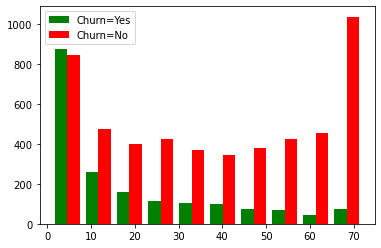

In [27]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()                                                        

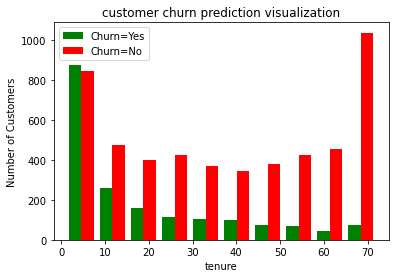

In [28]:

tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('customer churn prediction visualization')

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()                                                        

### Monthly charges plot

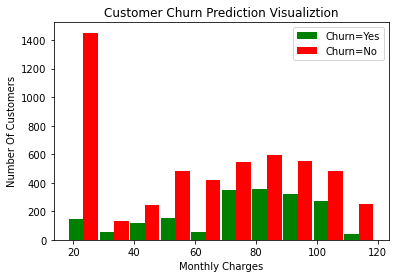

In [29]:

mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [30]:
for column in df1:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [31]:
for column in df1:
    print(df1[column].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [32]:
#to get column names with unique values we will use python f format string
for column in df1:
    print(f'{column}: {df1[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [33]:
#Now we will try to keep only categorical column
for column in df1:
    if df1[column].dtypes=='object':
        print(f'{column}: {df[column].unique()}')
        
    
    

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [34]:
def print_unique_col_values(df):
    for column in df1:
        if df1[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [35]:
#this will print all the unique values for all categorical column
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [36]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [37]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


### Now we will convert Yes and No to 1 and 0 as it will be easy for machine learning model

In [38]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [39]:
for column in df1:
    print(f'{column}: {df1[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [40]:
#we will gender to 0 and 1
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [41]:
df1.gender.unique()

array([1, 0], dtype=int64)

### Now we will use One hot encoding for categorical columns

In [42]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
#so for one column 'InternetService' with unique values ['DSL' 'Fiber optic' 'No'] we will get 
# 3 columns with 0 and 1
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [43]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [44]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [45]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
820,1,0,1,0,61,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4888,0,0,0,0,44,1,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0
259,1,1,1,0,29,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
6752,1,0,0,0,12,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1


In [46]:
df2.dtypes
#now there is no string or text

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [47]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] =scaler.fit_transform(df2[cols_to_scale])

In [48]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2270,1,1,0,0,0.028169,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5154,1,0,1,1,0.225352,1,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
5354,1,0,0,1,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [49]:

for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

## Train test split

In [50]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
#80 percent data for training and 20 percent data for testing

In [52]:
X_train.shape

(5625, 26)

In [53]:
X_test.shape

(1407, 26)

In [54]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [55]:
len(X_train.columns)

26

## Build a model (ANN) in tensorflow/keras

In [56]:
import tensorflow as tf
from tensorflow import keras

In [57]:

import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 774us/step - loss: 0.5356 - accuracy: 0.7090
Epoch 2/100
176/176 [==============================] - 0s 786us/step - loss: 0.4278 - accuracy: 0.7915
Epoch 3/100
176/176 [==============================] - 0s 804us/step - loss: 0.4172 - accuracy: 0.7998
Epoch 4/100
176/176 [==============================] - 0s 763us/step - loss: 0.4146 - accuracy: 0.8032
Epoch 5/100
176/176 [==============================] - 0s 773us/step - loss: 0.4108 - accuracy: 0.8082
Epoch 6/100
176/176 [==============================] - 0s 785us/step - loss: 0.4088 - accuracy: 0.8110
Epoch 7/100
176/176 [==============================] - 0s 764us/step - loss: 0.4069 - accuracy: 0.8068
Epoch 8/100
176/176 [==============================] - 0s 761us/step - loss: 0.4056 - accuracy: 0.8094
Epoch 9/100
176/176 [==============================] - 0s 826us/step - loss: 0.4044 - accuracy: 0.8116
Epoch 10/100
176/176 [==============================] - 0s 768us/step - l

176/176 [==============================] - 0s 707us/step - loss: 0.3539 - accuracy: 0.8313
Epoch 80/100
176/176 [==============================] - 0s 707us/step - loss: 0.3532 - accuracy: 0.8336
Epoch 81/100
176/176 [==============================] - 0s 792us/step - loss: 0.3525 - accuracy: 0.8322
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8316
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8356
Epoch 84/100
176/176 [==============================] - 0s 849us/step - loss: 0.3504 - accuracy: 0.8352
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8297
Epoch 86/100
176/176 [==============================] - 0s 900us/step - loss: 0.3521 - accuracy: 0.8334
Epoch 87/100
176/176 [==============================] - 0s 747us/step - loss: 0.3501 - accuracy: 0.8334
Epoch 88/100
176/176 [==============================] - 0s 707us/step - loss: 0.351

In [58]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 611us/step - loss: 0.4924 - accuracy: 0.7832


[0.49236688017845154, 0.783226728439331]

In [59]:

yp = model.predict(X_test)
yp[:5]

array([[0.1281716 ],
       [0.541013  ],
       [0.00159666],
       [0.8293263 ],
       [0.11899439]], dtype=float32)

In [60]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [61]:

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [62]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [63]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.53      0.59       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.78      1407



Text(69.0, 0.5, 'Truth')

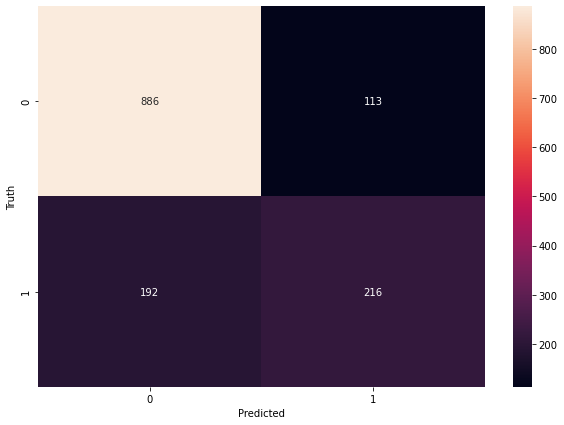

In [64]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
(855+234)/(855+234+144+174)

0.7739872068230277

### Accuracy

In [66]:
round((855+234)/(855+234+144+174),2)

0.77

### Precision for 0 class. i.e. Precision for customers who did not churn

In [67]:
round(855/(855+174),2)

0.83

### Precision for 1 class. i.e. Precision for customers who actually churned

In [68]:
round(234/(234+144),2)

0.62

### Recall for 0 class

In [69]:
round(855/(855+144),2)

0.86

### Recall for 0 class

In [70]:
round(234/(234+174),2)

0.57

# Handling Imbalance Dataset in Machine Learning

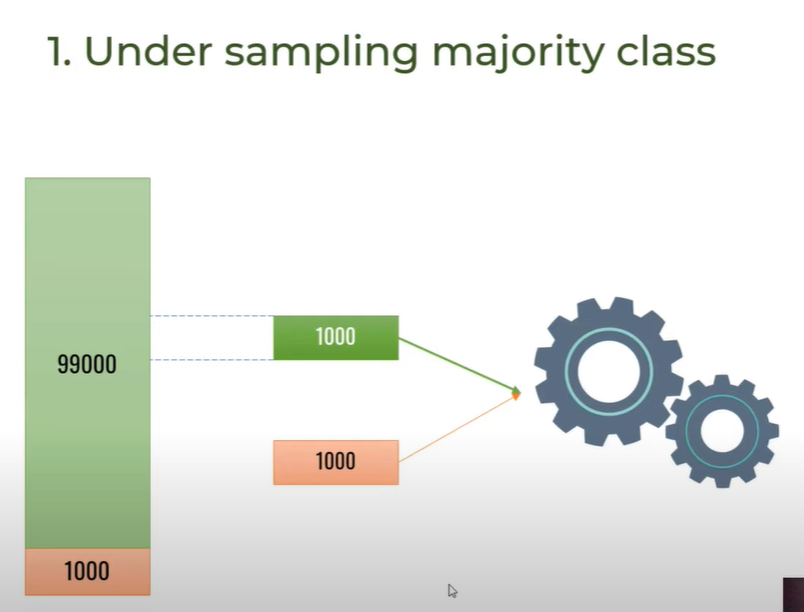

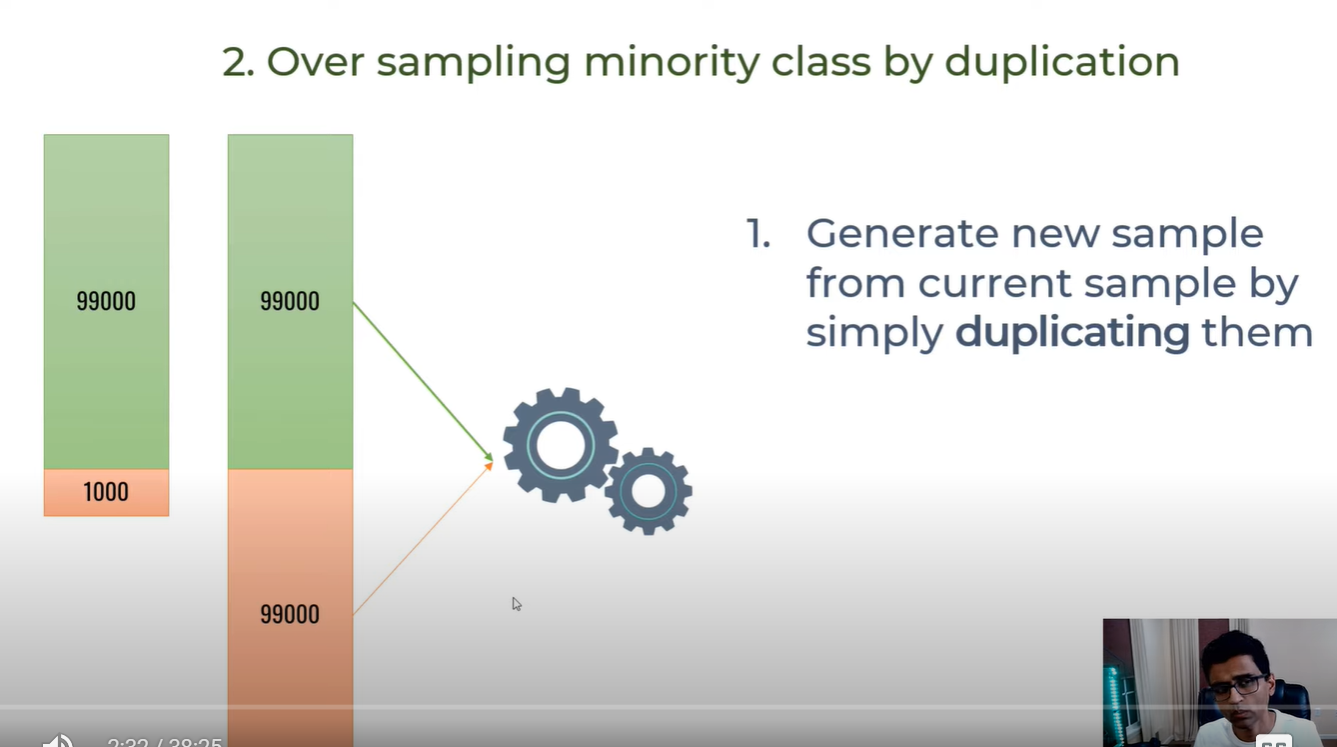

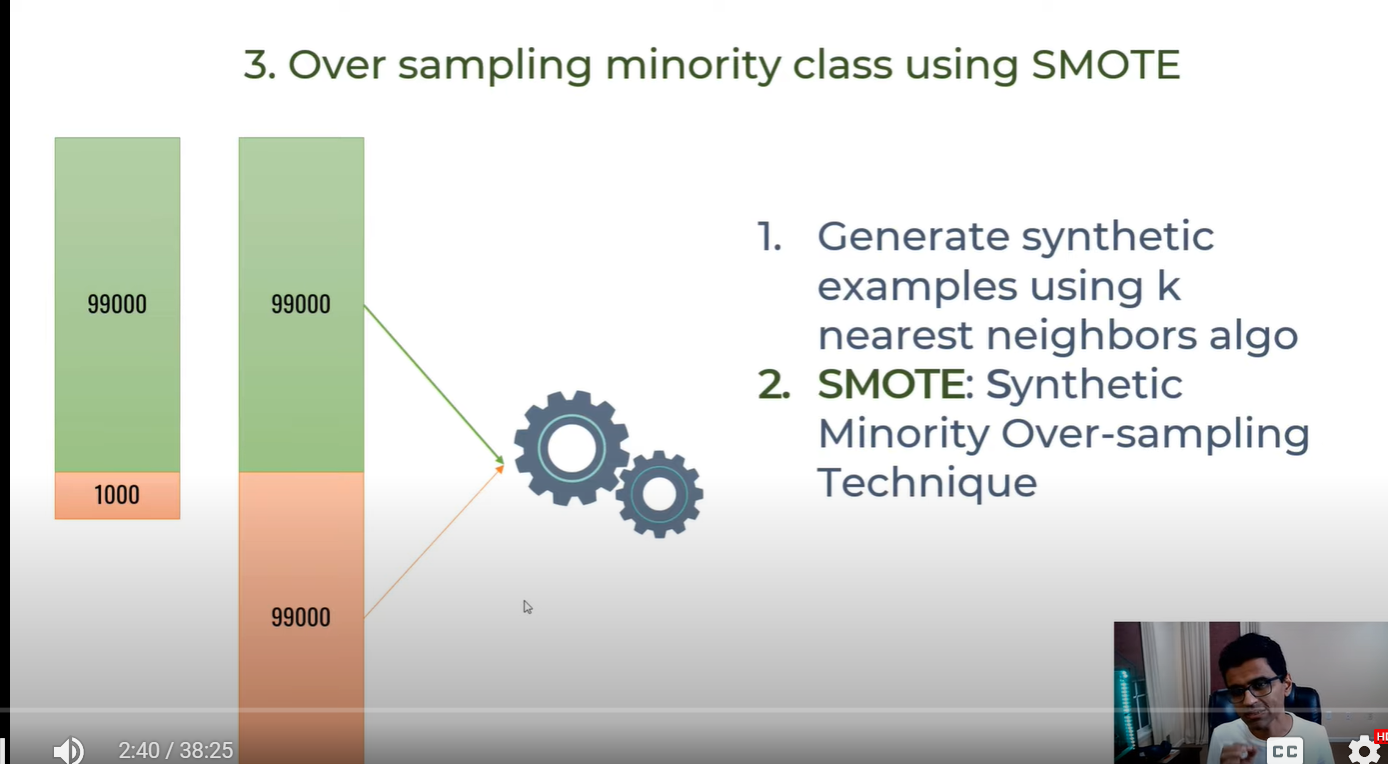

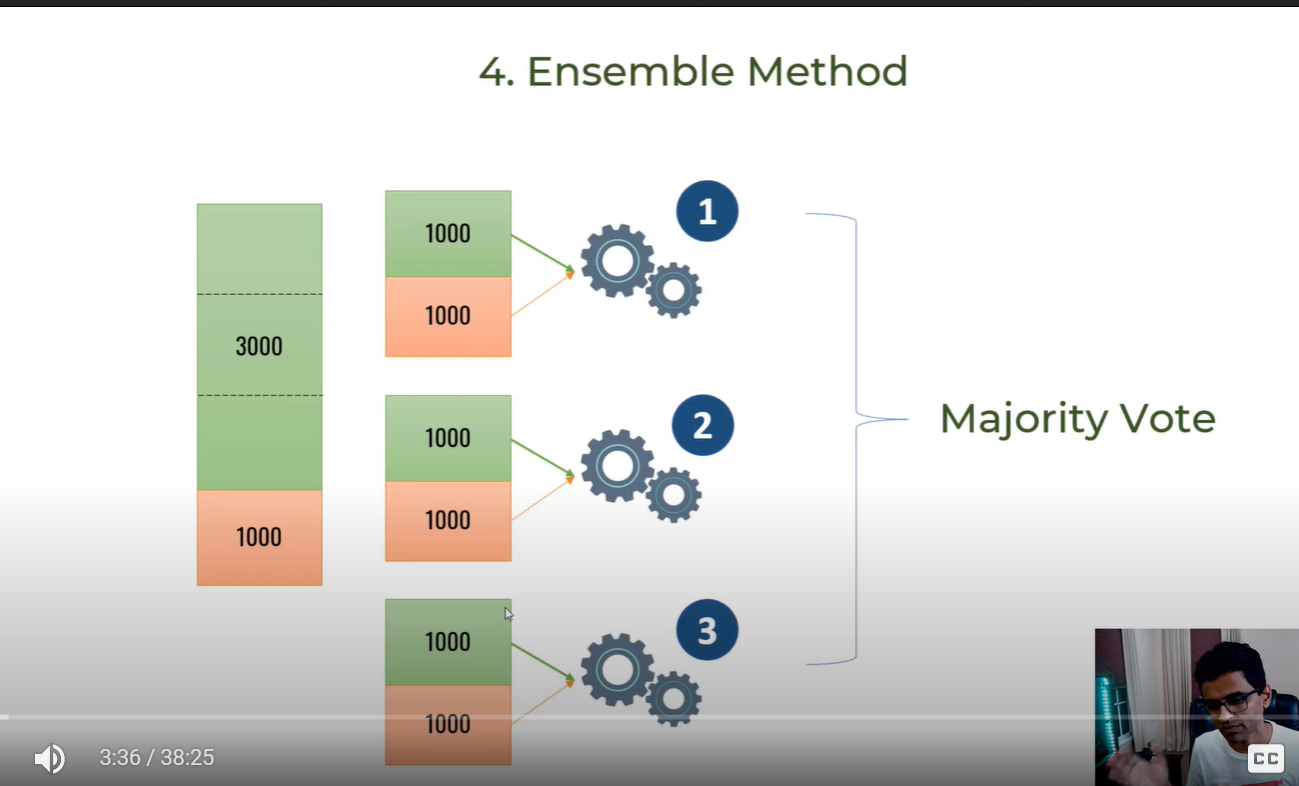

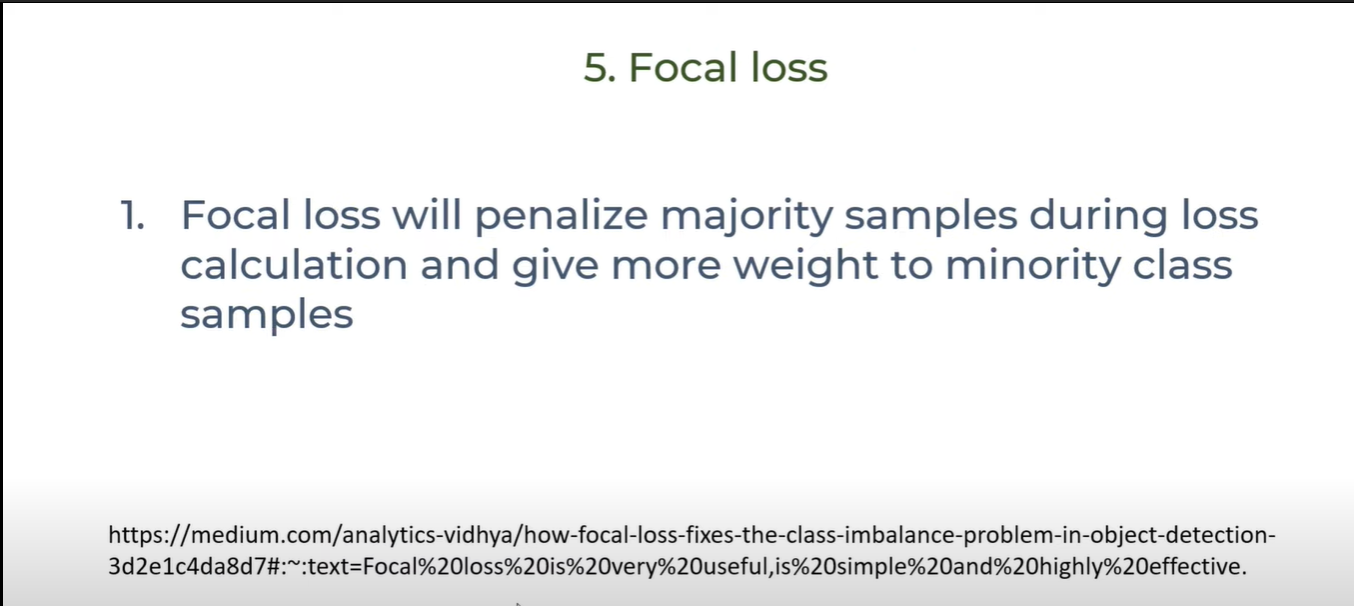

https://medium.com/analytics-vidhya/how-focal-loss-fixes-the-class-imbalance-problem-in-object-detection-3d2e1c4da8d7

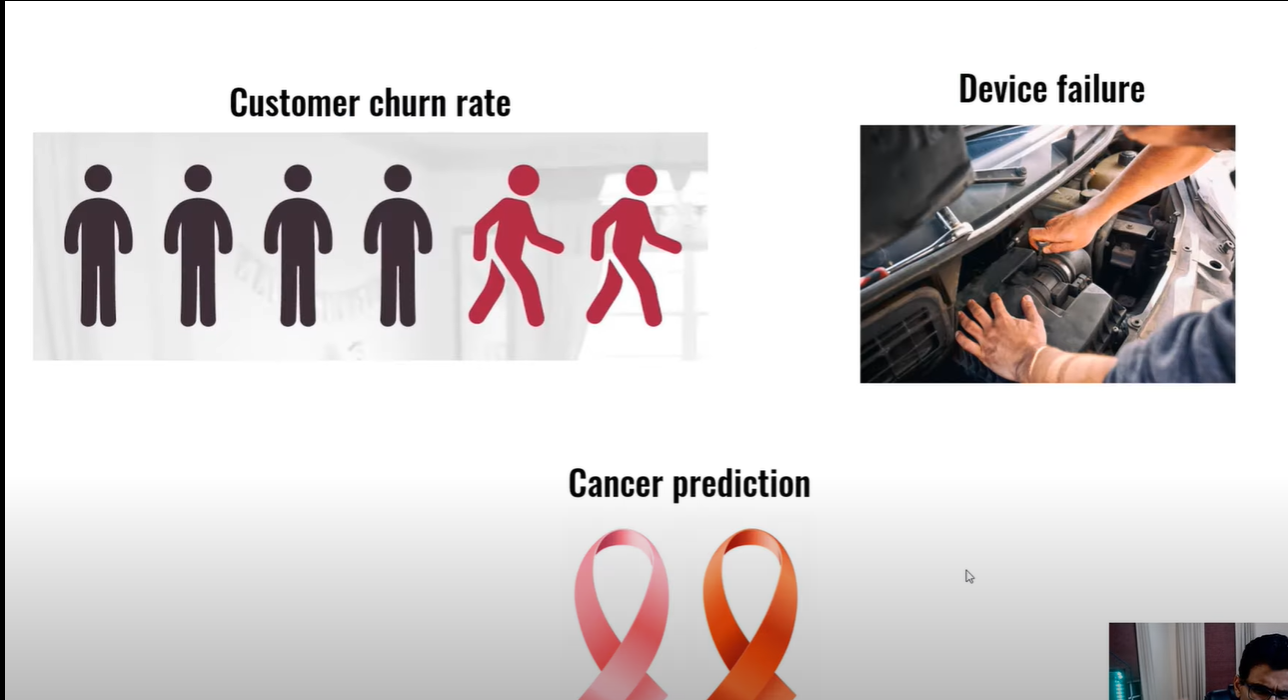

## Build a model (ANN) in tensorflow/keras

In [71]:
from tensorflow_addons import losses

In [72]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [73]:

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [74]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 0s 718us/step - loss: 0.5031 - accuracy: 0.7572
Epoch 2/100
176/176 [==============================] - 0s 758us/step - loss: 0.4292 - accuracy: 0.7982
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.8009
Epoch 4/100
176/176 [==============================] - 0s 997us/step - loss: 0.4157 - accuracy: 0.8053
Epoch 5/100
176/176 [==============================] - 0s 805us/step - loss: 0.4124 - accuracy: 0.8055
Epoch 6/100
176/176 [==============================] - 0s 735us/step - loss: 0.4100 - accuracy: 0.8057
Epoch 7/100
176/176 [==============================] - 0s 730us/step - loss: 0.4090 - accuracy: 0.8085
Epoch 8/100
176/176 [==============================] - 0s 718us/step - loss: 0.4059 - accuracy: 0.8089
Epoch 9/100
176/176 [==============================] - 0s 707us/step - loss: 0.4044 - accuracy: 0.8116
Epoch 10/100
176/176 [==============================] - 0s 724us/step - los

176/176 [==============================] - 0s 741us/step - loss: 0.3537 - accuracy: 0.8352
Epoch 80/100
176/176 [==============================] - 0s 724us/step - loss: 0.3547 - accuracy: 0.8341
Epoch 81/100
176/176 [==============================] - 0s 712us/step - loss: 0.3527 - accuracy: 0.8361
Epoch 82/100
176/176 [==============================] - 0s 718us/step - loss: 0.3539 - accuracy: 0.8359
Epoch 83/100
176/176 [==============================] - 0s 718us/step - loss: 0.3528 - accuracy: 0.8343
Epoch 84/100
176/176 [==============================] - 0s 769us/step - loss: 0.3517 - accuracy: 0.8343
Epoch 85/100
176/176 [==============================] - 0s 718us/step - loss: 0.3529 - accuracy: 0.8354
Epoch 86/100
176/176 [==============================] - 0s 764us/step - loss: 0.3521 - accuracy: 0.8338
Epoch 87/100
176/176 [==============================] - 0s 729us/step - loss: 0.3514 - accuracy: 0.8352
Epoch 88/100
176/176 [==============================] - 0s 712us/step - loss:

## Mitigating Skewdness of Data

### Method 1: Undersampling

reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [75]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [76]:

# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()



In [77]:
count_class_0

5163

In [78]:
# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [79]:
df_class_0.shape

(5163, 27)

In [80]:
df_class_1.shape

(1869, 27)

In [81]:
df_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4742,0,0,0,0,1.000000,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1550,0,1,1,0,0.070423,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0


In [82]:
df_class_0.sample(count_class_1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3032,0,0,0,0,0.225352,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4694,0,0,1,1,0.169014,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4497,0,1,1,0,0.830986,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
3548,0,0,0,0,0.985915,1,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
369,0,0,1,1,1.000000,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4562,1,0,1,1,0.985915,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
1091,0,0,0,0,0.394366,1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
691,0,0,1,1,0.422535,1,1,1,1,0,...,1,0,0,0,1,0,1,0,0,0
2722,0,0,1,1,0.436620,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [83]:

# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [84]:

X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [85]:
# Number of classes in training Data
y_train.value_counts()# we have same number of counts because of stratify argument

0    1495
1    1495
Name: Churn, dtype: int64

### Printing Classification in the last, Scroll down till the last epoch to watch the classification report

In [86]:

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 696us/step - loss: 0.6518 - accuracy: 0.6074
Epoch 2/100
94/94 [==============================] - 0s 686us/step - loss: 0.5244 - accuracy: 0.7448
Epoch 3/100
94/94 [==============================] - 0s 723us/step - loss: 0.5013 - accuracy: 0.7555
Epoch 4/100
94/94 [==============================] - 0s 697us/step - loss: 0.4954 - accuracy: 0.7625
Epoch 5/100
94/94 [==============================] - 0s 708us/step - loss: 0.4893 - accuracy: 0.7659
Epoch 6/100
94/94 [==============================] - 0s 697us/step - loss: 0.4841 - accuracy: 0.7686
Epoch 7/100
94/94 [==============================] - 0s 697us/step - loss: 0.4812 - accuracy: 0.7692
Epoch 8/100
94/94 [==============================] - 0s 708us/step - loss: 0.4785 - accuracy: 0.7679
Epoch 9/100
94/94 [==============================] - 0s 708us/step - loss: 0.4783 - accuracy: 0.7722
Epoch 10/100
94/94 [==============================] - 0s 686us/step - loss: 0.4752 - accura

94/94 [==============================] - 0s 887us/step - loss: 0.4154 - accuracy: 0.8087
Epoch 82/100
94/94 [==============================] - 0s 729us/step - loss: 0.4160 - accuracy: 0.8040
Epoch 83/100
94/94 [==============================] - 0s 719us/step - loss: 0.4150 - accuracy: 0.8070
Epoch 84/100
94/94 [==============================] - 0s 729us/step - loss: 0.4128 - accuracy: 0.8060
Epoch 85/100
94/94 [==============================] - 0s 729us/step - loss: 0.4121 - accuracy: 0.8104
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8037
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8080
Epoch 88/100
94/94 [==============================] - 0s 912us/step - loss: 0.4110 - accuracy: 0.8120
Epoch 89/100
94/94 [==============================] - 0s 914us/step - loss: 0.4112 - accuracy: 0.8104
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8090

## Method2: Oversampling

In [87]:
count_class_0,count_class_1

(5163, 1869)

In [88]:
#we have 1869 in class 1 suppose we want more than that by duplcating
df_class_1.sample(2000,replace=True).shape

(2000, 27)

In [89]:
df_class_1.sample(count_class_0,replace=True).shape

(5163, 27)

In [90]:

# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [91]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [92]:

# Number of classes in training Data
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [93]:
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [94]:

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 825us/step - loss: 0.5545 - accuracy: 0.7130
Epoch 2/100
259/259 [==============================] - 0s 848us/step - loss: 0.4900 - accuracy: 0.7633
Epoch 3/100
259/259 [==============================] - 0s 912us/step - loss: 0.4819 - accuracy: 0.7657
Epoch 4/100
259/259 [==============================] - 0s 903us/step - loss: 0.4770 - accuracy: 0.7695
Epoch 5/100
259/259 [==============================] - 0s 758us/step - loss: 0.4720 - accuracy: 0.7712
Epoch 6/100
259/259 [==============================] - 0s 766us/step - loss: 0.4702 - accuracy: 0.7737
Epoch 7/100
259/259 [==============================] - 0s 777us/step - loss: 0.4671 - accuracy: 0.7752
Epoch 8/100
259/259 [==============================] - 0s 765us/step - loss: 0.4636 - accuracy: 0.7758
Epoch 9/100
259/259 [==============================] - 0s 820us/step - loss: 0.4627 - accuracy: 0.7769
Epoch 10/100
259/259 [==============================] - 0s 803us/step - l

259/259 [==============================] - 0s 760us/step - loss: 0.3770 - accuracy: 0.8373
Epoch 80/100
259/259 [==============================] - 0s 748us/step - loss: 0.3753 - accuracy: 0.8379
Epoch 81/100
259/259 [==============================] - 0s 740us/step - loss: 0.3745 - accuracy: 0.8387
Epoch 82/100
259/259 [==============================] - 0s 748us/step - loss: 0.3754 - accuracy: 0.8351
Epoch 83/100
259/259 [==============================] - 0s 757us/step - loss: 0.3753 - accuracy: 0.8379
Epoch 84/100
259/259 [==============================] - 0s 748us/step - loss: 0.3739 - accuracy: 0.8374
Epoch 85/100
259/259 [==============================] - 0s 752us/step - loss: 0.3754 - accuracy: 0.8356
Epoch 86/100
259/259 [==============================] - 0s 748us/step - loss: 0.3725 - accuracy: 0.8401
Epoch 87/100
259/259 [==============================] - 0s 765us/step - loss: 0.3733 - accuracy: 0.8372
Epoch 88/100
259/259 [==============================] - 0s 737us/step - loss:

## Method3: SMOTE

### To install imbalanced-learn library use pip install imbalanced-learn command

In [95]:

X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [99]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [96]:
#pip install imbalanced-learn

In [98]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [101]:

# Number of classes in training Data
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [102]:
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [103]:

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 776us/step - loss: 0.5296 - accuracy: 0.7462
Epoch 2/100
259/259 [==============================] - 0s 805us/step - loss: 0.4655 - accuracy: 0.7789
Epoch 3/100
259/259 [==============================] - 0s 854us/step - loss: 0.4548 - accuracy: 0.7883
Epoch 4/100
259/259 [==============================] - 0s 792us/step - loss: 0.4477 - accuracy: 0.7890
Epoch 5/100
259/259 [==============================] - 0s 818us/step - loss: 0.4435 - accuracy: 0.7921
Epoch 6/100
259/259 [==============================] - 0s 826us/step - loss: 0.4398 - accuracy: 0.7939
Epoch 7/100
259/259 [==============================] - 0s 917us/step - loss: 0.4354 - accuracy: 0.7952
Epoch 8/100
259/259 [==============================] - 0s 799us/step - loss: 0.4328 - accuracy: 0.7990
Epoch 9/100
259/259 [==============================] - 0s 784us/step - loss: 0.4285 - accuracy: 0.8033
Epoch 10/100
259/259 [==============================] - 0s 808us/step - l

259/259 [==============================] - 0s 875us/step - loss: 0.3363 - accuracy: 0.8551
Epoch 81/100
259/259 [==============================] - 0s 733us/step - loss: 0.3367 - accuracy: 0.8551
Epoch 82/100
259/259 [==============================] - 0s 740us/step - loss: 0.3375 - accuracy: 0.8523
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8519
Epoch 84/100
259/259 [==============================] - 0s 970us/step - loss: 0.3336 - accuracy: 0.8533
Epoch 85/100
259/259 [==============================] - 0s 760us/step - loss: 0.3357 - accuracy: 0.8540
Epoch 86/100
259/259 [==============================] - 0s 779us/step - loss: 0.3355 - accuracy: 0.8579
Epoch 87/100
259/259 [==============================] - 0s 791us/step - loss: 0.3332 - accuracy: 0.8584
Epoch 88/100
259/259 [==============================] - 0s 872us/step - loss: 0.3325 - accuracy: 0.8542
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3

SMOT Oversampling increases f1 score of minority class 1 from 0.57 to 0.81 (huge improvement) Also over all accuracy improves from 0.78 to 0.80

## Method4: Use of Ensemble with undersampling

In [104]:

df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [105]:

# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [106]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [107]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [108]:
4130/1495  

2.762541806020067

In [109]:
4130/3

1376.6666666666667

In [110]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [111]:

df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [112]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [114]:
df3_class0.shape,df3_class1.shape

((4130, 27), (1495, 27))

In [115]:
df3_class0[:1495].shape

(1495, 27)

In [117]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [118]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 946us/step - loss: 0.6584 - accuracy: 0.6462
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5386 - accuracy: 0.7525
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5004 - accuracy: 0.7629
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4927 - accuracy: 0.7635
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.7676
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7706
Epoch 8/100
94/94 [==============================] - 0s 946us/step - loss: 0.4797 - accuracy: 0.7699
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.7712
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7732
Epoch

94/94 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8214
Epoch 82/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3924 - accuracy: 0.8197
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3920 - accuracy: 0.8271
Epoch 84/100
94/94 [==============================] - 0s 957us/step - loss: 0.3899 - accuracy: 0.8258
Epoch 85/100
94/94 [==============================] - 0s 945us/step - loss: 0.3910 - accuracy: 0.8241
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3899 - accuracy: 0.8211
Epoch 87/100
94/94 [==============================] - 0s 974us/step - loss: 0.3876 - accuracy: 0.8288
Epoch 88/100
94/94 [==============================] - 0s 865us/step - loss: 0.3881 - accuracy: 0.8237
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3863 - accuracy: 0.8264
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8258
Epoch

In [119]:
X_train.shape

(2990, 26)

In [120]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 860us/step - loss: 0.5848 - accuracy: 0.7077
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5146 - accuracy: 0.7518
Epoch 3/100
94/94 [==============================] - 0s 946us/step - loss: 0.5007 - accuracy: 0.7599
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4930 - accuracy: 0.7635
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7676
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7625
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.7666
Epoch 8/100
94/94 [==============================] - 0s 860us/step - loss: 0.4745 - accuracy: 0.7656
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7699
Epoch 10/100
94/94 [==============================] - 0s 946us/step - loss: 0.4685 - accuracy: 0.7749
E

94/94 [==============================] - 0s 751us/step - loss: 0.3826 - accuracy: 0.8217
Epoch 82/100
94/94 [==============================] - 0s 984us/step - loss: 0.3810 - accuracy: 0.8294
Epoch 83/100
94/94 [==============================] - 0s 931us/step - loss: 0.3818 - accuracy: 0.8234
Epoch 84/100
94/94 [==============================] - 0s 779us/step - loss: 0.3814 - accuracy: 0.8217
Epoch 85/100
94/94 [==============================] - 0s 940us/step - loss: 0.3806 - accuracy: 0.8281
Epoch 86/100
94/94 [==============================] - 0s 861us/step - loss: 0.3826 - accuracy: 0.8224
Epoch 87/100
94/94 [==============================] - 0s 773us/step - loss: 0.3774 - accuracy: 0.8254
Epoch 88/100
94/94 [==============================] - 0s 953us/step - loss: 0.3767 - accuracy: 0.8261
Epoch 89/100
94/94 [==============================] - 0s 906us/step - loss: 0.3763 - accuracy: 0.8294
Epoch 90/100
94/94 [==============================] - 0s 857us/step - loss: 0.3753 - accuracy: 

In [121]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 781us/step - loss: 0.5849 - accuracy: 0.7161
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.7681
Epoch 3/100
83/83 [==============================] - 0s 976us/step - loss: 0.4885 - accuracy: 0.7712
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.7715
Epoch 5/100
83/83 [==============================] - 0s 976us/step - loss: 0.4778 - accuracy: 0.7746
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7719
Epoch 7/100
83/83 [==============================] - 0s 878us/step - loss: 0.4734 - accuracy: 0.7731
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.7712
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.7746
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.7799
E

83/83 [==============================] - 0s 774us/step - loss: 0.3871 - accuracy: 0.8288
Epoch 82/100
83/83 [==============================] - 0s 976us/step - loss: 0.3871 - accuracy: 0.8281
Epoch 83/100
83/83 [==============================] - 0s 740us/step - loss: 0.3845 - accuracy: 0.8288
Epoch 84/100
83/83 [==============================] - 0s 863us/step - loss: 0.3854 - accuracy: 0.8250
Epoch 85/100
83/83 [==============================] - 0s 833us/step - loss: 0.3851 - accuracy: 0.8250
Epoch 86/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8269
Epoch 87/100
83/83 [==============================] - 0s 729us/step - loss: 0.3829 - accuracy: 0.8281
Epoch 88/100
83/83 [==============================] - 0s 842us/step - loss: 0.3820 - accuracy: 0.8300
Epoch 89/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3795 - accuracy: 0.8319
Epoch 90/100
83/83 [==============================] - 0s 738us/step - loss: 0.3814 - accuracy: 0.82

In [122]:

len(y_pred1)

1407

In [123]:
len(y_pred2)

1407

In [124]:
len(y_pred3)

1407

In [125]:

y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [127]:

cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1033
           1       0.48      0.80      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407



https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/14_imbalanced/handling_imbalanced_data_exercise.md